   # Прогнозирование оттока клиентов на основе данных BankChurners из сайта Kaggle
   ## Цель: проекта выявить ключевые причины оттока клиентов, построить  модель предсказывающую отток клиентов основе имеющихся данных

 ### 1.1 Предварительный анализ данных
 ### Импортируем библиотеки
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\ПК\\Desktop\\train_data\\BankChurners.csv') # Загружаем данные

In [3]:
# Удаляю две последние колонки так как в описании к данным было указано удалить эти колонки, так же удаляю колонку CLIENTNUM, так как индендификационный номер не несет значимой информации
df=df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'CLIENTNUM'], axis=1)

In [4]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
df.shape

(10127, 20)

In [6]:
df.columns #смотрим на названия наших колонок

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [7]:
d1 = {'M' : 'Male', 'F' : 'Female'}
df['Gender'] = df['Gender'].map(d1)

In [8]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,Male,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,Female,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,Male,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,Female,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,Male,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,Male,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,Male,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,Female,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,Male,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [9]:
# 6 признаков типа object
# 15 признаков типа int64 и float64
# В данных нет пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

 ## Смотрим на переменные в данных
- **Attrition_Flag**: Ключевая переменная активности клиента
- **Customer_Age**: Возраст клиента
- **Gender**: Пол клиента
- **Dependent_count**: Количество иждивенцов
- **Education_Level**: Уровень образования: Средняя школа, Выпускник, Необразованный, Неизвестно, Колледж, Аспирант, Докторант
- **Marital_Status**: Семейное положение: Женат/Замужем, Холост, Разведен, Неизвестно
- **Income_Category**: Годовой доход клиента: < 40K, 40K - 60K, 60K - 80K, 80K-120K
- **Card_Category**: Тип карты (Синяя, Серебряная, Золотая, Платиновая)
- **Months_on_book**: Период отношения с банком
- **Total_Relationship_Coun**: Общее количество продуктов, принадлежащих клиенту
- **Months_Inactive_12_mon**: Количество неактивных месяцев за 12 месяцев
- **Contacts_Count_12_mon**: Количество контактов за 12 месяцев
- **Credit_Limit**: Кредитный лимит по кредитной карте
- **Total_Revolving_Bal**: Общий возобновляемый баланс на Кредитной карте
- **Avg_Open_To_Buy**: Открыть кредитную линию на покупку (в среднем за последние 12 месяцев)
- **Total_Amt_Chng_Q4_Q1**: Изменение суммы транзакции (Q4 по сравнению с Q1)
- **Total_Trans_Amt**: Общая сумма транзакции (За Последние 12 месяцев)
- **Total_Trans_Ct**: Общее количество транзакций (За последние 12 месяцев)
- **Total_Ct_Chng_Q4_Q1**: Изменение количества транзакций (Q4 по сравнению с Q1)
- **Avg_Utilization_Ratio**: Средний коэффициент использования карты

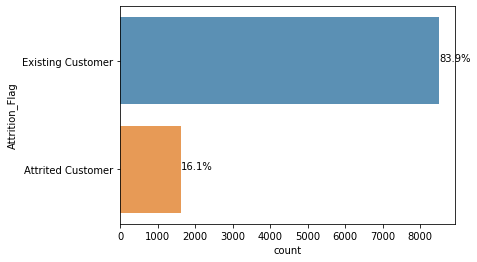

In [10]:
# График оттока количества клиентов, синий лояльные клиенты, оранжевые ушедшие клиенты
# Имеем дисбаланс класснов в соотношении на 16% на 84 %
ax = sns.countplot(y="Attrition_Flag", data=df, alpha=0.8)
total = df.shape[0]

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

plt.show()

In [11]:
# Отбираем признаки с типом данных объект
cols_obj = list(df.dtypes[df.dtypes == object].index[1:])

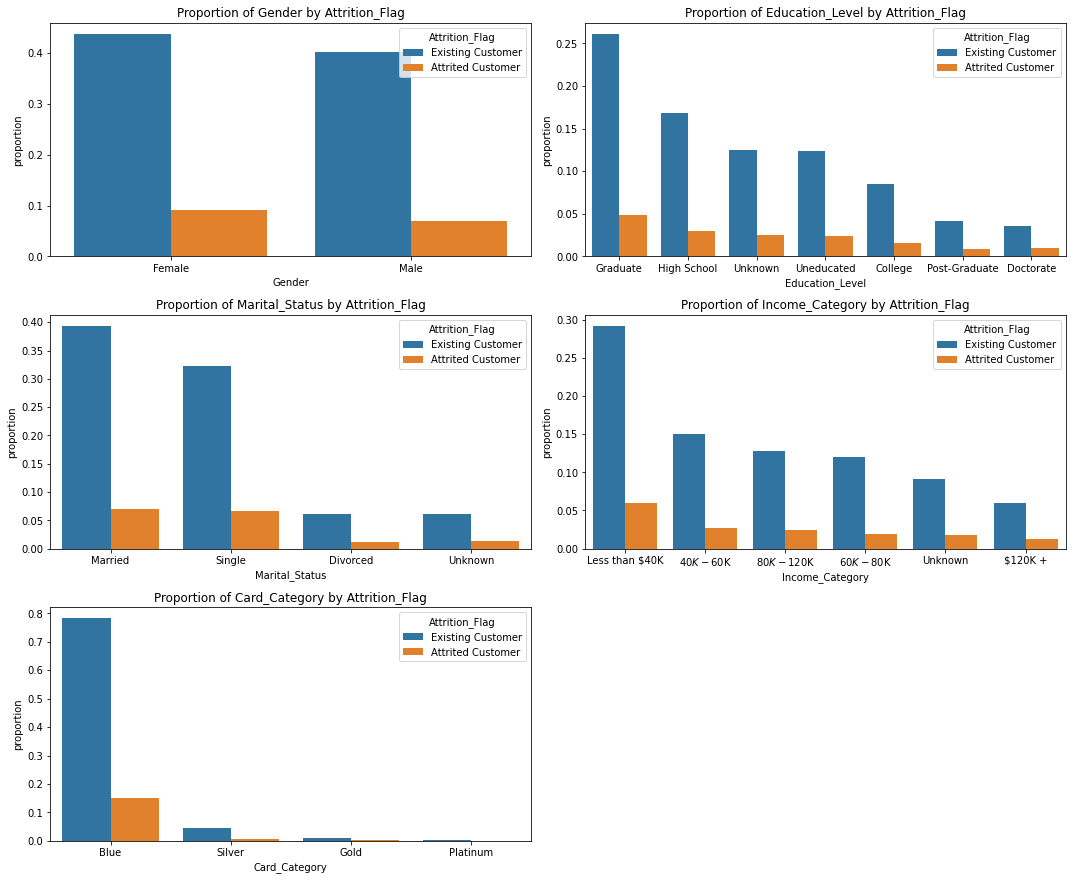

In [12]:
# Строим графики признаков, смортим имеется ли взаимосвязь между категориальными признаками и ключевой переменной
plt.figure(figsize=[15, 20])

i = 1
y, hue = "proportion", "Attrition_Flag"

for f in cols_obj:
    plt.subplot(5, 2, i)
    df[[f, 'Attrition_Flag']]\
        .value_counts(normalize=True)\
        .rename(y)\
        .reset_index()\
        .pipe((sns.barplot, "data"), x=f, y='proportion', hue='Attrition_Flag')
    plt.title("Proportion of {} by Attrition_Flag".format(f))
    i += 1
plt.tight_layout()
plt.show()

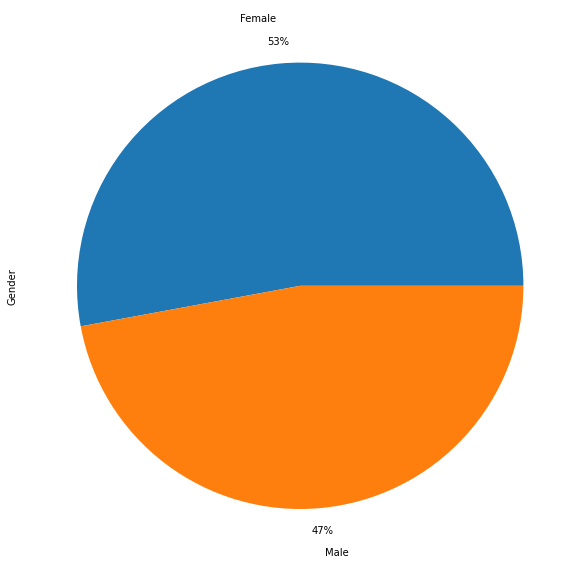

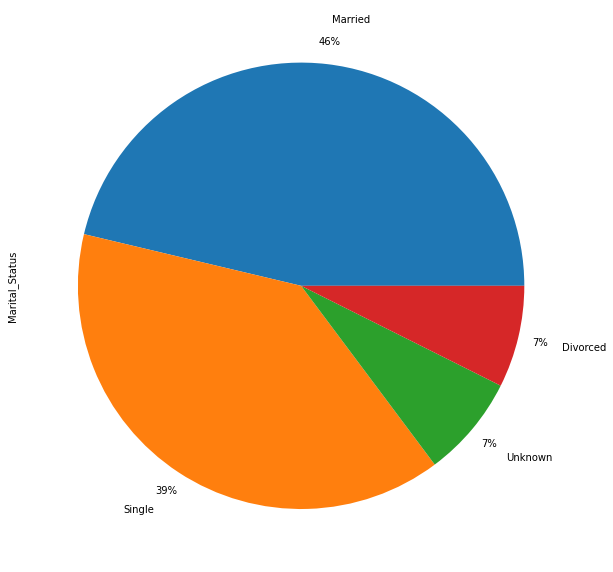

In [13]:
# Процентное соотношение мужчин и женщин в данных
plt.figure(figsize=[10,15])
df['Gender'].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);

# Процентое соотношение семейного положения клиентов
plt.figure(figsize=[10,15])
df['Marital_Status'].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);

### Из данных графиков можно предположить
- Уходят из банка больше всего клиенты с синей кредитной картой
- С зарабатной платой в год меньше 40K
- По уровню образования больше склонны выпускники ВУЗов
- По половому признаку немного преобладают женщины, но из-за того, что доля женщин в наших данных больше чем мужчин на 6%, можно предположить что это погрешность
- Не женатые имеют такое же количество людей ушедших как и женатые, при том что женатых больше на 7 %

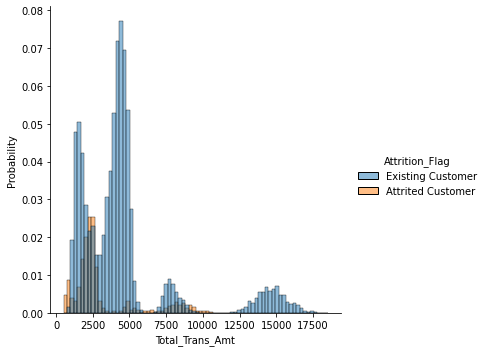

In [14]:
sns.displot(x='Total_Trans_Amt', hue='Attrition_Flag', data=df, stat="probability")
plt.show()

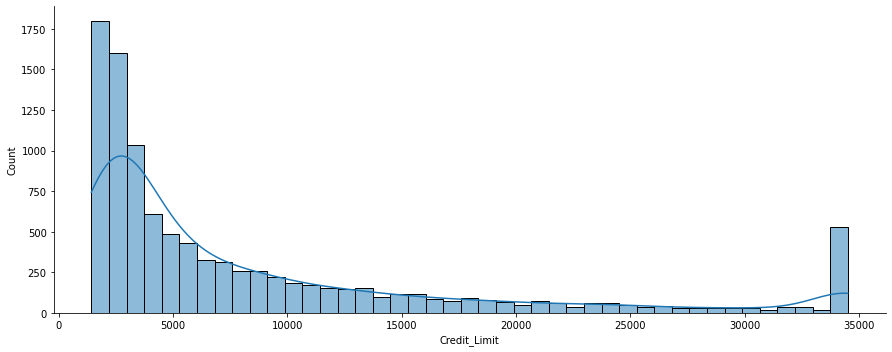

In [15]:
sns.displot(x='Credit_Limit', kde=True, aspect=2.5, data=df)
plt.show()

In [16]:
# Для удобства работы с данными, действующших клиентов Existing Customer прировняю к 0 и ушедших клиентов Attrited Customer прировняю к 1
d = {'Existing Customer' : 0, 'Attrited Customer' : 1}
df['Attrition_Flag'] = df['Attrition_Flag'].map(d)

## Импортируем библиотеки

## 1.2 Обучение моделей

## Данные буду обучать на следующих моделях
- 1) Логистическая регрессия (Logistic Regression)
- 2) Метод опорных векторов (SVM)
- 3) Метод случайного леса (Random Forest Classifier)

In [17]:
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score, plot_confusion_matrix, \
    plot_roc_curve, plot_precision_recall_curve, classification_report, precision_score, recall_score
import pickle
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings("ignore")
import eli5
from eli5.sklearn import PermutationImportance

In [68]:
# Инициализируем модели
random_forest_cl = RandomForestClassifier(random_state=17, n_estimators=100)
log_reg = LogisticRegression(n_jobs=-1, random_state=17)
svm = SVC(random_state=17, probability=True)
skf = StratifiedKFold(n_splits=5)

In [19]:
# Приводим признаки типа object к числовым переменным через команду get_dummies
X = pd.get_dummies(df, columns=df.dtypes[df.dtypes == object].index)
y = df['Attrition_Flag']
X = X.drop(['Attrition_Flag'], axis=1)

In [20]:
# Поскольку диапазон значений исходных данных сильно варьируется, в некоторых алгоритмах машинного обучения целевые функции не будут работать должным образом без нормализации. 
# Например, большинство классификаторов вычисляют расстояние между двумя точками по евклидову расстоянию. 
# Если один из объектов имеет широкий диапазон значений, то расстояние будет определяться этим конкретным объектом. 
# Поэтому диапазон всех объектов должен быть нормализован таким образом, чтобы каждый объект вносил примерно пропорциональный вклад в конечное расстояние.
# Для нормализации данных применяю метод StandardScaler

In [69]:
# Данные делим на тренировочные и тестовые в соотношении 70% на 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### В качестве первой модели буду использовать логистическую регрессию LogisticRegression

Логистическая регрессия (Logistic regression) — метод построения линейного классификатора, позволяющий оценивать апостериорные вероятности принадлежности объектов классам.Логистическая регрессия — это алгоритм классификации машинного обучения, используемый для прогнозирования вероятности категориальной зависимой переменной. В логистической регрессии зависимая переменная является бинарной переменной, содержащей данные, закодированные как 1 (да) или 0 (нет)

In [23]:
# Произведем обучение модели без корректировки гиперпараметров
log_reg_proba = log_reg.fit(X_train, y_train)
y_log_reg_proba = log_reg_proba.predict_proba(X_test)[:, 1]

In [24]:
log_reg_proba = log_reg.predict_proba(X_test)[:, 1]
y_pred_proba = log_reg.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2579
           1       0.74      0.61      0.67       460

    accuracy                           0.91      3039
   macro avg       0.83      0.79      0.81      3039
weighted avg       0.90      0.91      0.90      3039



In [26]:
log_reg_cnf_matrix = confusion_matrix(y_test, log_reg.predict(X_test))

In [27]:
log_reg_cnf_matrix

array([[2478,  101],
       [ 179,  281]], dtype=int64)

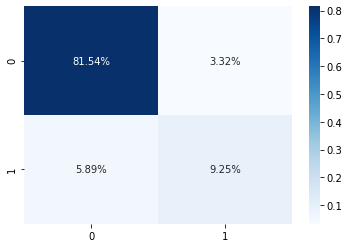

In [28]:
sns.heatmap(log_reg_cnf_matrix/np.sum(log_reg_cnf_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

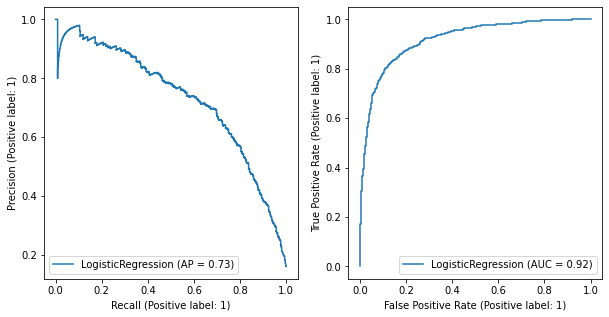

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

plot_precision_recall_curve(log_reg, X_test, y_test, ax=ax1)
plot_roc_curve(log_reg, X_test, y_test, ax=ax2);

Как видно из данного графика Логистическая регрессия на графике ROC_AUC дает очень хорошие результаты 0.92, но Precision и Recall дает оценку 0.73.

Для настройки гиперпараметров использую метод GridSearchCV

In [77]:
# Grid Search
log_reg = LogisticRegression(class_weight='balanced')
skf = StratifiedShuffleSplit(random_state=17)
param = {'C': np.linspace(0.001, 10, 10), 'penalty': ['l1', 'l2']}
grid_search_log_reg = GridSearchCV(log_reg, param, cv=skf)
grid_search_log_reg.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=17, test_size=None,
            train_size=None),
             estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': array([1.000e-03, 1.112e+00, 2.223e+00, 3.334e+00, 4.445e+00, 5.556e+00,
       6.667e+00, 7.778e+00, 8.889e+00, 1.000e+01]),
                         'penalty': ['l1', 'l2']})

In [78]:
log_reg_proba1 = grid_search_log_reg.predict_proba(X_test)[:, 1]
y_pred_proba1 = grid_search_log_reg.predict(X_test)

In [79]:
log_reg_cnf_matrix = confusion_matrix(y_test, grid_search_log_reg.predict(X_test))

In [80]:
print(classification_report(y_test, y_pred_proba1))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      2579
           1       0.41      0.75      0.53       460

    accuracy                           0.80      3039
   macro avg       0.68      0.78      0.70      3039
weighted avg       0.87      0.80      0.82      3039



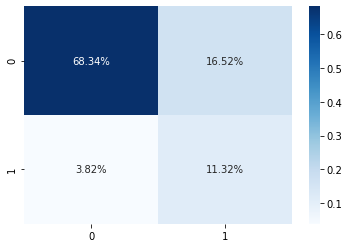

In [83]:
sns.heatmap(log_reg_cnf_matrix/np.sum(log_reg_cnf_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

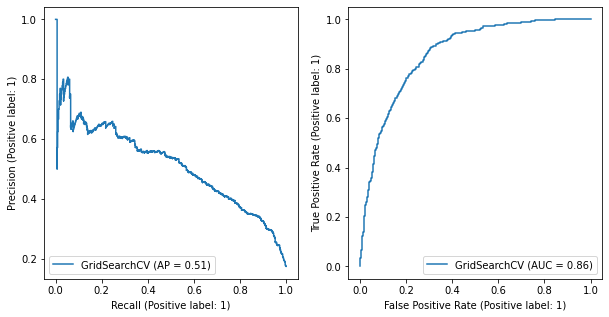

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

plot_precision_recall_curve(grid_search_log_reg, X_test, y_test, ax=ax1)
plot_roc_curve(grid_search_log_reg, X_test, y_test, ax=ax2);

После настройки гиперпараметров и балансировки классов результаты стали более реалистичными до этого показывали слишком высокие результаты

### В качестве второй модели использую метод случайного леса RandomForestClassifier

Случайный лес - это тип контролируемого алгоритма машинного обучения, основанного на ансамблевом обучении . Ансамблевое обучение-это тип обучения, при котором вы объединяете различные типы алгоритмов или один и тот же алгоритм несколько раз, чтобы сформировать более мощную модель прогнозирования. Алгоритм random forest объединяет несколько алгоритмов одного и того же типа , т. е. несколько решений деревьев , в результате чего получается лес деревьев

In [36]:
random_forest_cl.fit(X_train, y_train)

RandomForestClassifier(random_state=17)

In [37]:
random_forest_cl_proba = random_forest_cl.predict_proba(X_train)[:, 1]
y_log_reg_proba = random_forest_cl.predict(X_test)

In [38]:
print(classification_report(y_test, y_log_reg_proba))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2579
           1       0.90      0.77      0.83       460

    accuracy                           0.95      3039
   macro avg       0.93      0.88      0.90      3039
weighted avg       0.95      0.95      0.95      3039



In [39]:
rfc_cnf_matrix = confusion_matrix(y_test, random_forest_cl.predict(X_test))

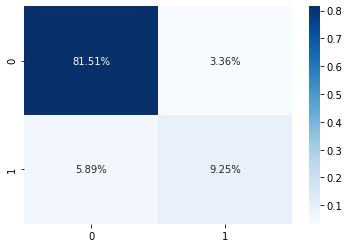

In [40]:
sns.heatmap(log_reg_cnf_matrix/np.sum(log_reg_cnf_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

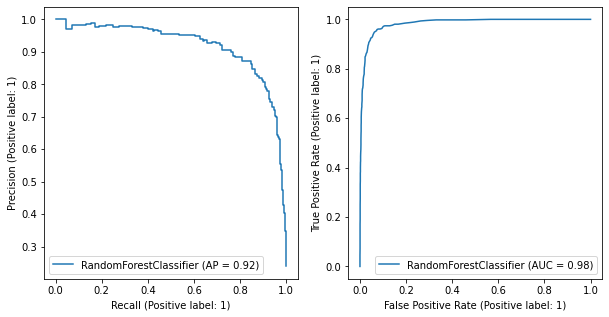

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

plot_precision_recall_curve(random_forest_cl, X_test, y_test, ax=ax1)
plot_roc_curve(random_forest_cl, X_test, y_test, ax=ax2);

Случайный лес показывает хорошие результаты и без настройки гиперпараметров ROC_AUC 0.98 и precision recall оценивает в 0.92

Сделаю небольшую настройку гиперпараметров чтоб оценить насколько изменится результаты, так же использую метод Grid Search

In [74]:
# Grid Search
random_forest_cl = RandomForestClassifier(random_state=17)
param = {'max_depth': [10, 30], 'n_estimators': [100, 500]}
grid_clf_rf = GridSearchCV(random_forest_cl, param, n_jobs=-1, cv=skf)
grid_clf_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=17, test_size=None,
            train_size=None),
             estimator=RandomForestClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': [10, 30], 'n_estimators': [100, 500]})

In [75]:
random_forest_cl_proba = grid_clf_rf.predict_proba(X_train)[:, 1]
y_clf_rf_proba = grid_clf_rf.predict(X_test)

In [85]:
print(classification_report(y_test, y_clf_rf_proba))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2579
           1       0.90      0.78      0.84       460

    accuracy                           0.95      3039
   macro avg       0.93      0.88      0.90      3039
weighted avg       0.95      0.95      0.95      3039



In [86]:
rfc_cnf_matrix = confusion_matrix(y_test, grid_clf_rf.predict(X_test))

In [87]:
rfc_cnf_matrix

array([[2537,   42],
       [ 100,  360]], dtype=int64)

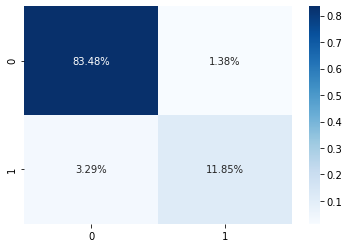

In [88]:
sns.heatmap(rfc_cnf_matrix/np.sum(rfc_cnf_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

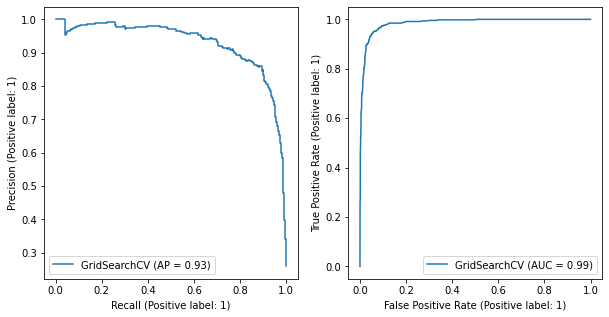

In [89]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

plot_precision_recall_curve(grid_clf_rf, X_test, y_test, ax=ax1)
plot_roc_curve(grid_clf_rf, X_test, y_test, ax=ax2);

В данном случае интересует как хорошо наша модель предсказывает класс 1 (клиентов склонных уйти). Согласно матрице ошибок наша модель верно нашла 78% клиентов. recall 0.78

### В качестве третьей модели использую метод опорных векторов SVC

Метод опорных векторов (англ. support vector machine, SVM) — один из наиболее популярных методов обучения, который применяется для решения задач классификации и регрессии. Основная идея метода заключается в построении гиперплоскости, разделяющей объекты выборки оптимальным способом. Алгоритм работает в предположении, что чем больше расстояние (зазор) между разделяющей гиперплоскостью и объектами разделяемых классов, тем меньше будет средняя ошибка классификатора.
Как мы указали ранее данные имеют дисбаланс классов. Для SVM дисбаланс классов может серьёзно влиять. SVM строит обучающую гиперплоскость так, что примерно одно и то же число положительных и отрицательных примеров находится на разделяющей полосе или на неправильной её стороне

In [97]:
svm.fit(X_train, y_train)

SVC(probability=True, random_state=17)

In [98]:
y_log_svm_proba = svm.predict(X_test)

In [99]:
svm_proba = svm.predict_proba(X_train)[:, 1]
y_svm_proba = svm.predict(X_test)

In [100]:
print(classification_report(y_test, y_svm_proba))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2579
           1       0.00      0.00      0.00       460

    accuracy                           0.85      3039
   macro avg       0.42      0.50      0.46      3039
weighted avg       0.72      0.85      0.78      3039



In [101]:
svm_cnf_matrix = confusion_matrix(y_test, svm.predict(X_test))

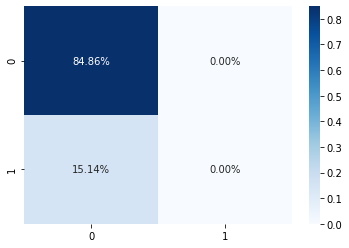

In [102]:
sns.heatmap(svm_cnf_matrix/np.sum(svm_cnf_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

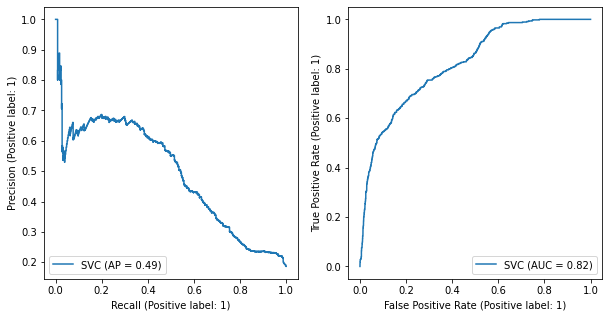

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

plot_precision_recall_curve(svm, X_test, y_test, ax=ax1)
plot_roc_curve(svm, X_test, y_test, ax=ax2);

- Метод SCV не подходит для данной задачи, присваивает всем значениям класс 0

In [90]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']} 
svc_grid_search = GridSearchCV(svm, param_grid, refit = True, verbose = 3, cv=skf)
svc_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=  45.7s
[CV 2/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=  41.3s
[CV 3/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=  42.3s
[CV 4/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=  47.2s
[CV 5/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=  46.9s
[CV 6/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=  51.6s
[CV 7/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=  48.3s
[CV 8/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=  50.0s
[CV 9/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=  51.7s
[CV 10/10] END ...................C=0.1, gamma=1, kernel=rbf; total time=  51.8s
[CV 1/10] END ..................C=0.1, gamma=0.1, kernel=rbf; total time=  51.8s
[CV 2/10] END ..................C=0.1, gamma=0.1

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=17, test_size=None,
            train_size=None),
             estimator=SVC(probability=True, random_state=17),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [91]:
svm_proba = svc_grid_search.predict_proba(X_train)[:, 1]
y_scm_proba = svc_grid_search.predict(X_test)

In [92]:
print(classification_report(y_test, y_scm_proba))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2579
           1       0.67      0.01      0.02       460

    accuracy                           0.85      3039
   macro avg       0.76      0.50      0.47      3039
weighted avg       0.82      0.85      0.78      3039



In [93]:
svmCV_cnf_matrix = confusion_matrix(y_test, svc_grid_search.predict(X_test))

In [94]:
svmCV_cnf_matrix

array([[2577,    2],
       [ 456,    4]], dtype=int64)

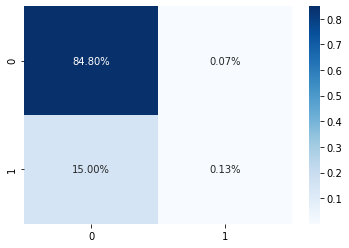

In [95]:
sns.heatmap(svmCV_cnf_matrix/np.sum(svmCV_cnf_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

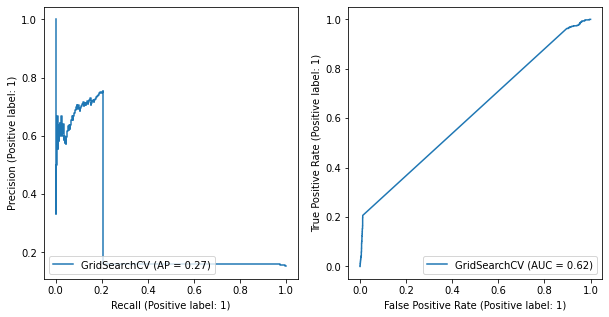

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

plot_precision_recall_curve(svc_grid_search, X_test, y_test, ax=ax1)
plot_roc_curve(svc_grid_search, X_test, y_test, ax=ax2);

Как видно из значений матрицы ошибок и графика ROC_AUC данный метод не годится, скорее всего это связано из-за дисбаланса классов. Данная модель всем значениям присовила класс 0, то есть нет клиентов скольных уйты, хотя это не так.

## 2. Вывод
- Для таких задач очень хорошо подходят древовидные методы как случайный лес или более сложные модели как XgBoost, CatBoost
- Логистическая регрессия очень эффективно работает на данных у который большое количество признаков, тогда как алгоритмы леса начинают переобучаться
- SVC эффективно работает когда данные не имеют сильного дисбаланса как в наших данных